# 19 Στατιστική με SciPy (λύσεις)  

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το μάθημα θα δούμε βασικές έννοιες στατιστικής και πως μπορεί να αξιοποιηθεί η αντίστοιχη βιβλιοθήκη, ενώ θα δούμε πως μπορούμε να ελέγξουμε τα δεδομένα και τα μοντέλα μας ώστε να καταλάβουμε κατά πόσο μπορούμε να εμπιστευτούμε τα συμπεράσματα. Θα δούμε:
    
- έννοιες πιθανοτήτων
    
- βασικές μεθόδους `scipy.stats`
    
- έλεγχο υπόθεσης (βήμα βήμα)
    
- σημαντικότητα αποτελεσμάτων 
    
- στατιστικές μετρικές

- σύγκριση κατανομών.
</div>

## 19.1 Εισαγωγή

Οι **μετρήσεις** που πραγματοποιούμε κατά την διάρκεια των πειραμάτων ή των παρατηρήσεων μας αποτελούν μια έκφανση του φυσικού φαινομένου που εξετάζουμε. Μέσα από αυτές μπορούμε να πάρουμε πληροφορίες για την συνολικότερη συμπεριφορά των φαινομένων, και να φτιάξουμε κάποια **υποψήφια μοντέλα** που να τα περιγράφουν. 

Πάντα όμως η γνώση μας είναι περιορισμένη και δεν μπορούμε να ξέρουμε όλα τα πιθανά ενδεχόμενα. Έτσι καταλήγουμε να μιλάμε για το πόσο πιθανά σωστές είναι οι μετρήσεις μας σε σχέση με το μοντέλο. Μπορούμε όμως να ποσοτικοποιήσουμε αυτή την διαδικασία και έτσι καταλήγουμε στον **έλεγχο υπόθεσης** (**hypothesis testing**). 

## 19.2 Πιθανότητα

### 19.2.1 Ορισμός

Η θεμελιώδης έννοια της στατιστικής είναι η πιθανότητα, που ορίζεται ως Ρ(Α), και αναπαριστά την συχνότητα εμφάνισης ενός γεγονότος Α (ή την προσδοκία που έχουμε). Η πιθανότητα ορίζεται μέσα στο διάστημα [0,1], όπου το 0 αντιπροσωπεύει είναι απίθανο γεγονός ενώ το 1 ένα σίγουρο.

### 19.2.2 Ιδιότητες

- Μπορούμε να ορίσουμε το συμπληρωματικό (ή εναλλακτικό) γεγονός (σενάριο όπου το Α δεν αληθεύει): P(Ac) = 1 - P(A). 

- Πάντα όμως το σύνολο όλων των πιθανών σεναρίων είναι 1: Ρ(Α) + Ρ(Β) + ... = 1.

- Δεσμευμένη πιθανότητα Ρ(Α|Β) είναι η πιθανότητα ενός γεγονότος Α δεδομένου (παρουσίας) ενός γεγονός Β, δηλαδή όταν αληθεύουν και τα δύο. Είναι χρήσιμη για να εκφράσουμε σχέσεις εξάρτησης.  

- Η κοινή πιθανότητα των δύο γεγονότων Α και Β, μπορεί να εκφραστεί μέσα από την δεσμευμένη πιθανότητα: Ρ(Α and B) = Ρ(Α,Β) = Ρ(Α|Β)Ρ(Β), που σημαίνει ότι η πιθανότητα να συμβαίνουν τα δύο γεγονότα Α και Β ισούται με την πιθανότητα του Α δεδομένου του Β, επί την πιθανότητα του Β. Η παραγοντοποίηση πιθανοτήτων μας βοηθάει να απλοποιήσουμε εκφράσεις με πιο απλούς όρους. 

- Αν τα δύο γεγονότα είναι εντελώς ανεξάρτητα, τότε η δεσμευμένη πιθανότητα Ρ(Α|Β) απλοποιείται στην πιθανότητα και μόνο του γεγονός Α, ενώ η κοινή πιθανότητα Ρ(Α,Β) απλοποιείται στον πολλαπλασιασμό των δύο πιθανοτήτων, δηλαδή Ρ(Α)Ρ(Β). Αυτό χρησιμοποιείται συχνά σαν υπόθεση για να απλοποιήσει τις εκφράσεις. 

- 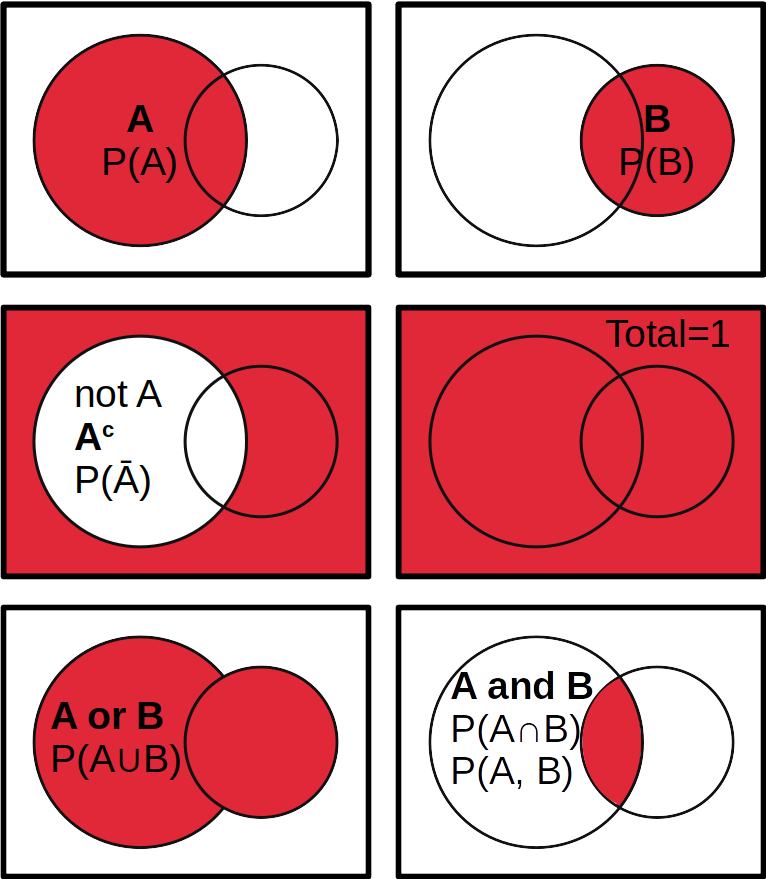

### 19.2.3 Συνεχείς μεταβλητές

Τι γίνεται στην περίπτωση που δεν έχουμε μεμονωμένα γεγονότα αλλά συνεχείς μεταβλητές; Π.χ όταν μετράμε θερμοκρασίες, μάζες, ακτίνες, κλπ.

Ας δούμε ένα παράδειγμα από ένα κατάλογο που περιέχει τις συντεταγμένες από λευκούς νάνους ('ra' και 'dec') και τα μεγέθη από φωτομετρικές παρατηρήσεις σε διαφορετικά φίλτρα (_u, g, r, i, z_). Ο κατάλογος προέχεται από την δουλειά των [Kleinman et al. 2013](https://ui.adsabs.harvard.edu/abs/2013yCat..22040005K/abstract). 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

db = pd.read_csv('data_files/Kleinman2013_cleared.csv')

In [2]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      886 non-null    float64
 1   dec     886 non-null    float64
 2   u       886 non-null    float64
 3   g       886 non-null    float64
 4   r       886 non-null    float64
 5   i       886 non-null    float64
 6   z       886 non-null    float64
dtypes: float64(7)
memory usage: 48.6 KB


Ας κάνουμε ένα ιστρόγραμμα για το χρώμα 'g-r'. 

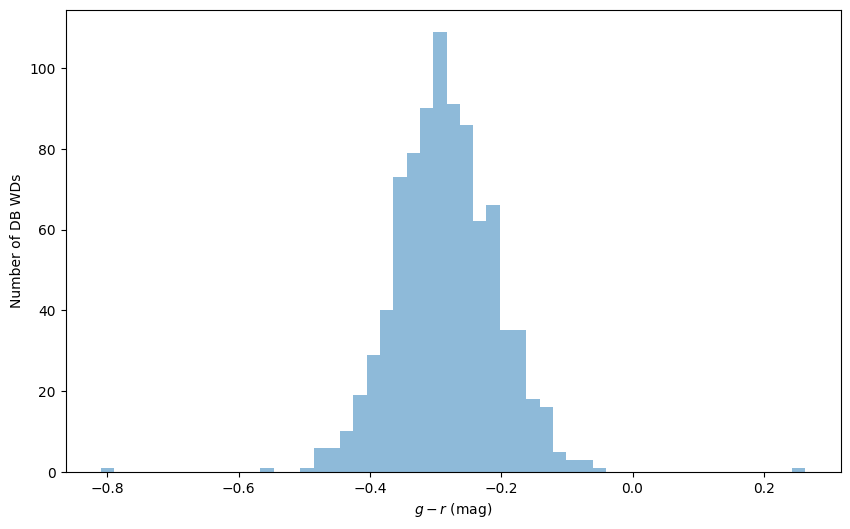

In [3]:
g_r = db['g']-db['r']

plt.figure(figsize=(10,6))
plt.hist(g_r, bins="fd", alpha=0.5)
# ‘fd’ (Freedman Diaconis Estimator)
# Robust (resilient to outliers) estimator 
# that takes into account data variability and data size.

plt.xlabel("$g-r$ (mag)")
plt.ylabel("Number of DB WDs")
plt.show()

**Ερώτηση:** Ποια είνα η πιθανότητα ένας λευκός νάνος να έχει τιμή 'g-r' = -0.3; 

In [4]:
# computing the fraction of values with g-r = -0.3
# find how many items match the value exactly
# mean provides their frequency, so the probability
print(f"P(g-r = {-0.3:.6f}) = {np.mean(g_r == -0.3):.4f}")

# equivalent to :
# print((g_r == -0.3).sum()/len(g_r))

P(g-r = -0.300000) = 0.0000


In [5]:
# finding the value closest to -0.3 and 
# computing the fraction of the data having it
value_close_to_it = g_r[np.argmin(np.abs(g_r - (-0.3)))]
print(f"P(g-r = {value_close_to_it:.6f}) = {np.mean(g_r == value_close_to_it):.4f}")

# equivalent to 
# print((g_r == value_close_to_it).sum()/len(g_r))
# or even:
# print( 1/ len(g_r))

P(g-r = -0.300028) = 0.0011


Δηλαδή όταν έχουμε μια συνεχή μεταβλητή η πιθανότητα να βρεθεί μια συγκεκριμένη τιμή είναι 0! Αντίθετα αν δώσουμε κάποιο περιθώριο τότε η πιθανότητα ανεβαίνει (στην δεύτερη περίπτωση αναζητήσαμε τουλάχιστον μια μέτρηση κοντά στην τιμή -0.3). Οπότε μπορούμε να υπολογίζουμε πιθανότητες χρησιμοποιώντας ένα εύρος τιμών. Πχ ποια θα ήταν η πιθανότητα (Ρ(g-r < -0.3)) να έχουμε τιμές 'g-r'<-0.3 ; 

In [6]:
# the fraction of colors less than -0.3
np.mean(g_r < -0.3)

0.4198645598194131

Η τιμή αυτή είναι προφανώς συμπληρωματική του εναλλακτικού σεναρίου, δηλαδή για 'g-r'>-0.3.

In [7]:
# the fraction of colors less than -0.3
np.mean(g_r >= -0.3)

0.5801354401805869

Οπότε η ένοια της πιθανότητα P(x) μπορεί να χρησιμοποιηθεί αλλά ως **πυκνότητα πιθανότητας**, και η οποία πολλαπλασιάζεται με ένα αμελητέο διάστημα dx: 

$$ P(x) dx \simeq P( x < x' < x + \Delta x) \Delta x $$

Για την ολική πιθανότητα ισχύει ότι:

$$ \int_{-\infty} ^{+\infty} P(x) dx = 1 $$.

Οι συναρτήσεις πυκνότητας πιθανότητας (**probability density functions - pdf**) είναι συναρτήσεις που περιγράφουν χρήσιμες κατανομές πιθανότητας. Η πιο γνωστή και χρήσιμη είναι η Γκαουσιανή (Gaussian) ή κανονική (normal):

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left[ -\frac{\left(x-\mu\right)^2}{2\sigma^2} \right] $$

η οποία και συντομογραφικά δίνεται και από τον τύπο $\mathcal{N}(\mu, \sigma^2)$, όπου $\mu$ και $\sigma$ είναι ο μέσος όρος και η τυπική απόκλιση. Αν λοιπόν τα δεδομένα μας ακολουθούν αυτή την κατανομή τότε ο μέσος όρος του δείγματος και η τυπική του απόκλιση μπορούν να χρησιμοποιηθούν για να εκφράσουν την συνάρτηση κατανομής με αυτόν τον τρόπο. 

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.1</b>
    
1. Χρησιμοποιώντας τις παραπάνω μετρήσεις χρώματος (g_r) βρείτε τον μέσο όρο του δείγματος και την τυπική του απόκλιση. 
    
2. Στη συνέχεια δημιουργήστε μια σειρά τιμών για το x με τιμές των 'g-r' που βρίσκονται 5σ πάνω και κάτω από τον μέσο όρο.
    
3. Υπολογίστε τις τιμές της Γκαουσιανής PDF, χρησιμοποιώντας τον παραπάνω τύπο. 
    
4. Κάντε ένα ιστόγραμμα τον τιμών 'g-r' χρησιμοποιώντας για bins=30, και προσθέστε τις τιμές x,y που δημιουργήσατε στα βήματα 2 και 3. 
    
5. Τι παρατηρείτε;

In [8]:
# You can try it here

-0.284704658013544 0.07806358346006693


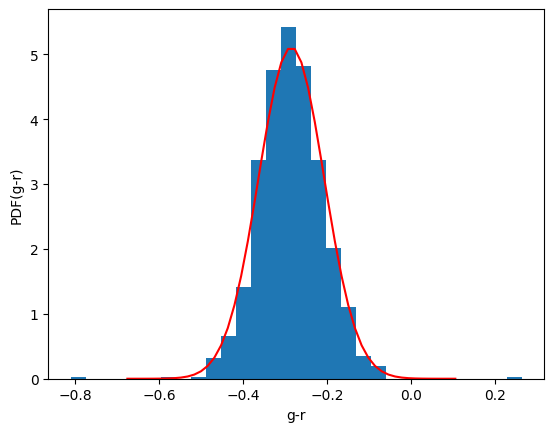

In [9]:
sample_mean = np.mean(g_r)
sample_std = np.std(g_r)

print(sample_mean, sample_std)
# let's plot 5 sigmas around the mean value...
x_values = np.linspace(sample_mean-5*sample_std, 
                     sample_mean+5*sample_std, 50)

# ...the Gaussian PDF
y_values = 1 / np.sqrt(2*np.pi*sample_std**2.0) * np.exp(-(x_values-sample_mean)**2.0/(2*sample_std**2.0))

plt.hist(g_r, bins=30, density=True)
plt.plot(x_values, y_values, "r-")
plt.xlabel('g-r')
plt.ylabel('PDF(g-r)')
plt.show()

By default, το ιστόγραμμα δεν κανονικοποιεί την κατανομή των δεδομένων μας, και έτσι η Γκαουσιαννή θεωρητική κατανομή που έχουμε κάνει δεν ταιριάζει. Θα πρέπει να θέσουμε `density=True`, οπότε και τα δεδομένα μας κανονικοποιούνται έτσι ώστε το εμβαδόν του να είναι ίσο με την 1, ότι περιμένουμε από την συνάρτηση πυκνότητας πιθανότητας που κάναμε. 

## 19.3 Η βιβλιοθήκη `scipy.stats`

Η βιβλιοθήκη SciPy περιέχει ένα πακέτο για στατιστική ανάλυση, με πολλές συναρτήσεις και εργαλεία διευκόλυνσης. Την εισάγουμε και αυτή όπως όλες τις βιβλιοθήκες, συνήθως σαν:

```python
import scipy.stats as st
```

### 19.3.1 Συνάρτηση κατανομής πιθανότητας

Ας δούμε πως θα μπορούσαμε να υπολογίσουμε εύκολα τις τιμές για την Γκαουσιαννή κατανομή που χρειαστήκαμε στην προηγούμενη άσκηση,  μέσω της `scipy.stats.norm()`.


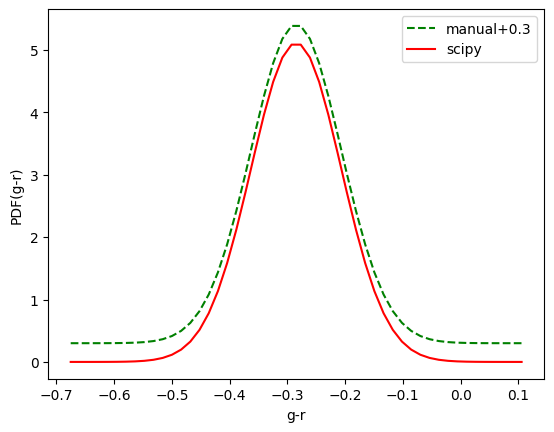

In [10]:
import scipy.stats as st

pdf = st.norm.pdf(x_values, loc=sample_mean, scale=sample_std)

offset = 0.3
plt.plot(x_values, y_values+offset, "g--", label=f"manual+{offset}" )
plt.plot(x_values, pdf, "r-", label="scipy")
plt.xlabel('g-r')
plt.ylabel('PDF(g-r)')
plt.legend()
plt.show()

Στην βιβλιοθήκη είναι διαθέσιμες διάφορες συναρτήσεις κατανομής πιθανότητας:

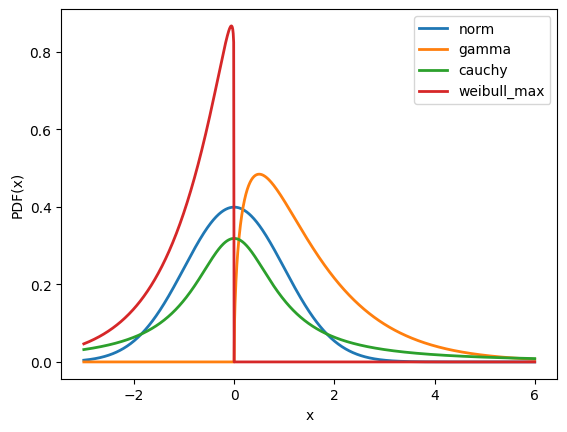

In [11]:
x_points = np.linspace(-3, 6.0, 1000)

# various distributions to try
distributions = [
    st.norm(),
    st.gamma(1.5),
    st.cauchy(),
    st.weibull_max(1.05),
]

for distribution in distributions:
    pdf = distribution.pdf(x_points)
    plt.plot(x_points, pdf, label=distribution.dist.name, lw=2)
plt.legend(loc="upper right")
plt.ylabel("PDF(x)")
plt.xlabel("x")
plt.show()

### 19.3.2 Συγκεντρωτική συνάρτηση κατανομής

Ορίζεται ως η πιθανότητα "μέχρι μια τιμή":

$$ F(x) = \int\limits_{-\infty}^{x} f(x')\,dx'$$

όπου $f(x)$ είναι η συνάρτηση κατανομής πιθανότητας. Μπορούμε να πάρουμε εύκολα την τιμή της συγκεντρωτικής συνάρτησης κατανομής (cumulative distribution function) αν εφαρμόσουμε την μέθοδο `.cdf()` σε οποιαδήποτε συνάρτηση κατανομής. Σε πολλές εφαρμογές αποτυπώνουμε την τιμή αυτής σε σχέση με την παράμετρο x για να δούμε πως συμπεριφέρεται (αθροιστικά) η πιθανότητα. 

Ας δούμε συνολικά για όλες τις προηγούμενες συναρτήσεις: 

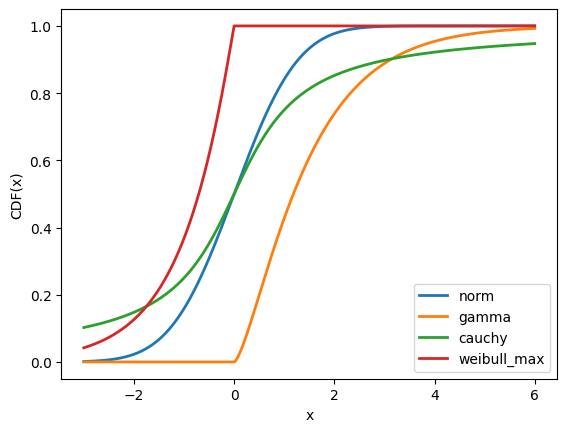

In [12]:
for distribution in distributions:
    cdf = distribution.cdf(x_points)
    plt.plot(x_points, cdf, label=distribution.dist.name, lw=2)
plt.legend(loc="lower right")
plt.ylabel("CDF(x)")
plt.xlabel("x")
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.2</b>
    
Επαναλάβετε την άσκηση 19.1 αλλά σχεδιάστε τώρα την συγκεντρωτική κατανομή πιθανότητας. 
    
> TIP: Για την συνάρτηση `plt.hist()` χρησιμοποιείστε την επιλογή `cumulative=1` για να κάνει αυτόματα την συγκεντρωτική κατανομή τους.
    >
    
    

In [13]:
# You can try it here

-0.284704658013544 0.07806358346006693


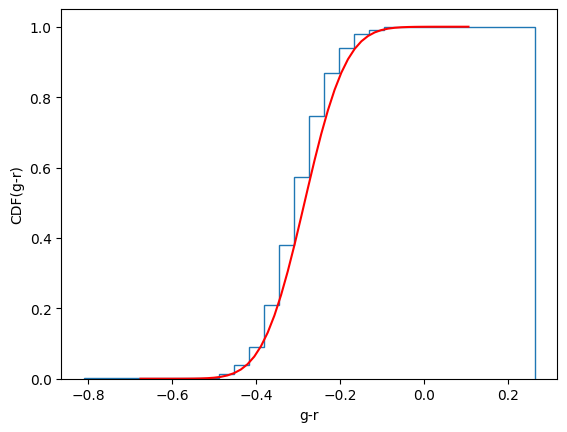

In [14]:
sample_mean = np.mean(g_r)
sample_std = np.std(g_r)

print(sample_mean, sample_std)
# let's plot 5 sigmas around the mean value...
x_values = np.linspace(sample_mean-5*sample_std, 
                     sample_mean+5*sample_std, 50)

# ...the Gaussian CDF
cdf = st.norm.cdf(x_values, loc=sample_mean, scale=sample_std)

plt.hist(g_r, bins=30, density=True, 
         cumulative=1, histtype="step", label="Data")
plt.plot(x_values, cdf, "r-", label='CDF')
plt.xlabel('g-r')
plt.ylabel('CDF(g-r)')
plt.show()

### 19.3.3 Χρήσιμες μέθοδοι

Η SciPy διαθέτει μια σειρά από μεθόδους που μπορούν να εφαρμοστούν κατευθείαν στις κατανομές και στα δεδομένα μας, και μας παρέχουν πληροφορίες ή είναι βοηθητικές. Μερικά παραδείγματα:

- `.describe()`: παρέχει βασικές στατιστικές πληροφορίες για την κατανομή.

- `.rvs()`: επιστρέφει ένα τυχαίο σημείο μιας κατανομής

- `.ppf()`: (percent point function) επιστρέφει το σημείο της κατανομής που αντιστοιχεί στο ποσοστό πιθανότητας (quantile, εκατοστημόριο) που δίνεται σαν όρισμα της συνάρτησης (και το οποίο είναι η συγκεντρωτική πιθανότητα CDF). Οπότε η συνάρτηση αυτή είναι ουσιαστικά αντίστροφη της CDF.   

In [15]:
# provides basic information
st.describe(g_r)

DescribeResult(nobs=886, minmax=(-0.8099060000000016, 0.26336299999999824), mean=-0.284704658013544, variance=0.0061008088513981665, skewness=0.09459031574471653, kurtosis=4.522889468656984)

In [16]:
# select random point from distribution
x_single = st.norm(loc=5, scale=2).rvs()
print(x_single)
print()

# multiple points
x_multiple = [st.norm(loc=5, scale=2).rvs() for i in range(10)]
print(x_multiple)
print()

# a better direct way
x_typical = st.norm(loc=5, scale=2).rvs(10) 
print(x_typical)

4.866604432025498

[6.205750981491482, 1.9659231538757442, 5.963315245875991, 8.582224144911745, 5.4515594301347, 5.530727747660678, 1.8459928311240392, 5.276983993835626, 4.041501491585169, 7.8451937338402855]

[7.94154643 8.26455355 6.62748682 3.15546177 4.21103968 5.76291709
 6.71802977 4.47869238 6.58230629 8.5346573 ]


In [17]:
# returns the point x which corresponds to the requested probability 
dist = st.norm(loc=5, scale=2)

print(dist.ppf(0.2))
print(dist.ppf(0.5))
print(dist.ppf(0.99))

3.3167575328541714
5.0
9.652695748081682


Με την μέθοδο `.ppf()` μπορούμε να πάρουμε πολύ εύκολα τα διαστήματα εμπιστοσύνης, δηλαδή τις τιμές από την κατανομή που αντιστοιχούν στην πιθανότητα με την οποία μια πραγματική τιμή θα βρίσκεται σε αυτό το διάστημα. Ας βρούμε το 90% διάστημα εμπιστοσύνης για την κατανομής μας.

In [18]:
low90 = dist.ppf(0.05)
upp90 = dist.ppf(0.95)

print(f'Confidence interval at 90%: {low90:0.2f} -- {upp90:0.2f}')

Confidence interval at 90%: 1.71 -- 8.29


<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.3 - Fill the gaps</b>
    
Χρησιμοποιώντας ότι είδαμε προηγουμένως συμπληρώστε τα κενά σε αυτή την άσκηση ακολουθώντας τα βήματα σε κάθε σημείο.
    

In [ ]:
from scipy.optimize import minimize

# Follow the steps

# the plotting range
x_points = np.linspace(0.0, 4.0, 300)

# Use a normal distribution if you want
# dist = st.norm(2.0, 0.35)

# ... or the Fisk (or lof-logistic) distribution to use, 
# check https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisk.html
dist = st.fisk(2.5)

# draw a large sample from the distribution
sample = ... 

# calculate the PDF in the plotting range
pdf = ... 

# calculate the CDF in the plotting range
cdf = ...

# compute the mean, median, and standard deviation
mean = ...
median = ...
std = ...

# find the 5% percentile, and the 68% confidence interval
p05 = ...
lo68, hi68 = ... 

# search for the maximum of the distribution (mode)
mode = minimize(lambda x: -dist.pdf(x), x0=median).x

# report what we found

print(f"Standard deviation: {std:.4f}")

plt.figure()
plt.hist(..., bins="fd", density=True,
         histtype="step", color="b", lw=1, label="Sample")
plt.plot(..., ..., "k-", lw=2, label="PDF")
plt.plot(..., ..., "k:", lw=2, label="CDF")
plt.axvspan(..., ..., color="m", alpha=0.3, ec="none", label="68% CI")
plt.axvline(..., color="k", ls="-", lw=4, label="Mode")
plt.axvline(..., color="r", ls="-", lw=3, label="Mean")
plt.axvline(..., color="g", lw=2, label="Median")
plt.axvline(..., color="m", label="5% percentile")
plt.legend(loc="center right")
plt.xlim(0.0, 4.0)
plt.ylim(ymin=0.0)
plt.show()


Standard deviation: 1.5906


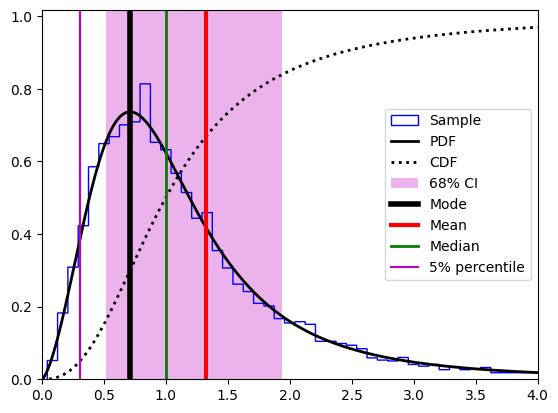

In [19]:
from scipy.optimize import minimize

# Follow the steps

# the plotting range
x_points = np.linspace(0.0, 4.0, 300)

# dist = st.norm(2.0, 0.35)

# the Fisk (or lof-logistic) distribution to use, 
# check https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisk.html
dist = st.fisk(2.5)

# draw a (large) sample from the distribution
sample = dist.rvs(size=10000)

# calculate the PDF in the plotting range
pdf = dist.pdf(x_points)

# calculate the CDF in the plotting range
cdf = dist.cdf(x_points)

# compute the mean, median, and standard deviation
mean = dist.mean()
median = dist.median()
std = dist.std()

# find the 5% percentile, and the 68% confidence interval
p05 = dist.ppf(0.05)
lo68, hi68 = dist.ppf(0.16), dist.ppf(0.68+0.16)
# or equivalently 
# lo68, hi68 = dist.interval(0.68)

# search for the maximum of the distribution (mode)
mode = minimize(lambda x: -dist.pdf(x), x0=median).x


# report what we found

print(f"Standard deviation: {std:.4f}")

plt.figure()
plt.hist(sample, bins="fd", density=True,
         histtype="step", color="b", lw=1, label="Sample")
plt.plot(x_points, pdf, "k-", lw=2, label="PDF")
plt.plot(x_points, cdf, "k:", lw=2, label="CDF")
plt.axvspan(lo68, hi68, color="m", alpha=0.3, ec="none", label="68% CI")
plt.axvline(mode, color="k", ls="-", lw=4, label="Mode")
plt.axvline(mean, color="r", ls="-", lw=3, label="Mean")
plt.axvline(median, color="g", lw=2, label="Median")
plt.axvline(p05, color="m", label="5% percentile")
plt.legend(loc="center right")
plt.xlim(0.0, 4.0)
plt.ylim(ymin=0.0)
plt.show()

## 19.4 Έλεγχος υπόθεσης

### 19.4.1 Ορισμός

Ο έλεγχος υπόθεσης είναι η διαδικασία που πραγματοποιείται για να ελέγξουμε μια υπόθεση σχετικά με μια παράμετρο ενός πληθυσμού, χρησιμοποιώντας ένα δείγμα του. 

Για να το δούμε αυτό θα χρησιμοποιήσουμε ένα παράδειγμα από μετρήσεις για σφαιρωτά σμήνη ([globular clusters](https://en.wikipedia.org/wiki/Globular_cluster) - GC).

### 19.4.2 Δεδομένα 

#### Οι μετρήσεις

Η ομάδα (Vela Masetti κ.ά.), εκτίμησε τις μάζες σφαιρικών σμηνών χρησιμοποιώντας μετρήσεις διασποράς ταχύτητας.

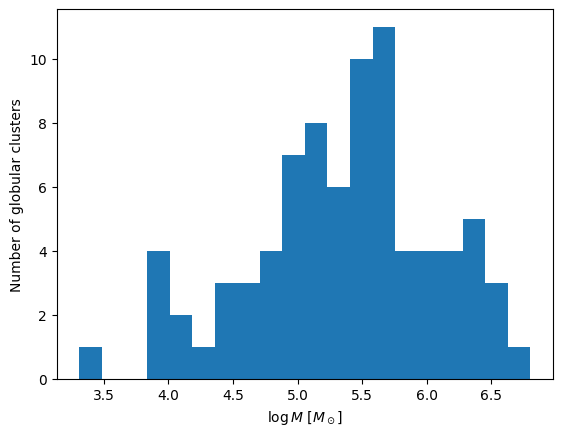

In [20]:
import numpy as np
import matplotlib.pyplot as plt

masses = np.genfromtxt("data_files/GC_MWG_masses.csv")
log_masses = np.log10(masses)

plt.figure()
plt.hist(log_masses, bins=20)
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("Number of globular clusters")
plt.show()


#### Το θεωρητικό μοντέλο

Οι Globis & Clusterton (2022) χρησιμοποίησαν υδροδυναμικές προσομοιώσεις γαλαξιών για να μοντελοποιήσουν το σχηματισμό σμηνών σφαιρικών (GC) σε έναν γαλαξία όπως τον δικό μας. Βρήκαν ότι οι μάζες των "συνθετικών" αυτών σμηνών περιγράφονται από μια λογαριθμική-κανονική (Γκαουσιανή) κατανομή (log-normal distribution). Πιο συγκεκριμένα, είναι ο λογάριθμος των μαζών που ακολουθεί την κανονική κατανομή:

$$ \log_{10} \left(\frac{M}{M_\odot}\right) \sim \mathcal{N}(5.5, 1) $$

που σημαίνει ότι οι μάζες των σμηνών κορυφώνονται στο $10^{5.5} M_\odot \simeq 3.2\times 10^5 M_\odot$ και η τυπική διασπορά είναι $1\,\mathrm{dex}$ (μία τάξη μεγέθους).

Ας δούμε αυτό το μοντέλο μαζί με τα δεδομένα...

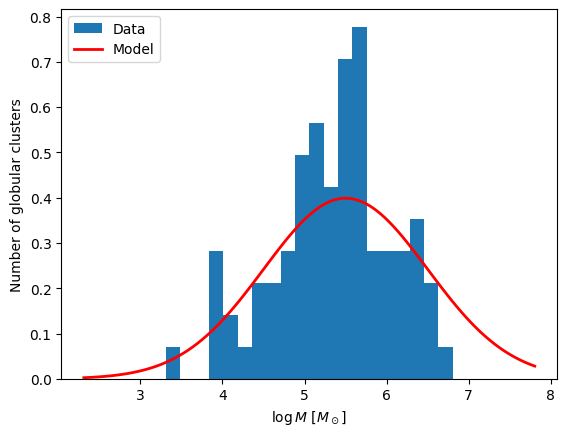

In [21]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

model_mean = 5.5
model_std = 1.0

logm_for_plot = np.linspace(min(log_masses)-1, max(log_masses)+1, 100)
model_prob_for_plot = st.norm(model_mean, model_std).pdf(logm_for_plot)

plt.figure()
plt.hist(log_masses, bins=20, density=True, label="Data")
plt.plot(logm_for_plot, model_prob_for_plot, "r-", lw=2, label="Model")
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("Number of globular clusters")
plt.legend(loc="upper left")
plt.show()

In [22]:
sample_mean = np.mean(log_masses)
sample_std = np.std(log_masses)

print(f"MODEL:  Mean = {model_mean:.2f} | Std = {model_std:.2f}")
print(f"SAMPLE: Mean = {sample_mean:.2f} | Std = {sample_std:.2f}")

MODEL:  Mean = 5.50 | Std = 1.00
SAMPLE: Mean = 5.35 | Std = 0.72


Ωραία... μπορέσαμε να υπολογίσουμε τον μέσο όρο και την τυπική απόκλιση από το δείγμα των μαζών που είχαμε. Τι σημαίνουν αυτά τα νούμερα όμως; 

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.4 - Ερωτήσεις για συζήτηση </b>
        
*1. Είναι ο μέσος όρος από το δείγμα και από το μοντέλο κοντά;*
    
*2. Δίνει η τυπική απόκλιση μια αίσθηση του πόσο κοντά είναι οι μέσες τιμές;*

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Απάντηση</summary></b>

1.  Δεν υπάρχει σωστή απάντηση... είναι υποκειμενικό (του τι θεωρεί ο καθένας/καθεμία "κοντά". Ο στόχος μας είναι να **ποσοτικοποιήσουμε** την "υποκειμενικότητα".
<br>    
<br>
2. Όχι ακριβώς. Η τυπική απόκλιση περιγράφει το πόσο διασπείρονται τα δεδομένα. Η ίδια δεν λέει κάτι για την διασπορά της μέσης τιμής του δείγματος από την αυτή που περιμένουμε από το μοντέλο.
<br>
</details>

### 19.4.3 Τυπικό σφάλμα της μέσης τιμής

To αν οι μέσες τιμές είναι κοντά εξαρτάται επίσης από το μέγεθος του δείγματος. Όσο μεγαλύτερο είναι, τόσο πιο ακριβής είναι η εκτίμησή μας για τη μέση τιμή, και αναμένουμε να συγκλίνει στη μέση τιμή του υποκείμενου πληθυσμού (και εκείνης του μοντέλου αν είναι σωστό).

Για δεδομένα που ακολουθούν κανονική κατανομή, η **τυπική απόκλιση της μέσης τιμής** εξαρτάται από το δείγμα ως:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}} $$

όπου $\sigma$ είναι η τυπική απόκλιση του πληθυσμού και $N$ το μέγεθος του δείγματος.

Στις περισσότερες περιπτώσεις, η απόκλιση του _πληθυσμού_ είναι άγνωστη. Για αυτό το λόγο, χρησιμοποιούμε το ίδιο δείγμα για να την εκτιμήσουμε, υπολογίζοντας την _τυπική απόκλιση του δείγματος_ $s$. Η τυπική απόκλιση της μέσης τιμής του δείγματος ονομάζεται **τυπικό σφάλμα της μέσης τιμής**:

$$ s_{\bar{x}} = \frac{s}{\sqrt{N}} $$

Η μέση τιμή του δείγματος θεωρείται ότι ακολουθεί κανονική κατανομή, και επομένως μπορούμε να υπολογίσουμε τον αριθμό των τυπικών σφαλμάτων που η μέση τιμή του δείγματος απέχει από τη θεωρητική τιμή, ή "τα σίγμα". Μπορούμε να υπολογίσουμε το τυπικό σφάλμα της μέσης τιμής μέσω της μεθόδου `.sem()`.

Standard error of the mean = 0.08
Sigma's of difference      : 1.80


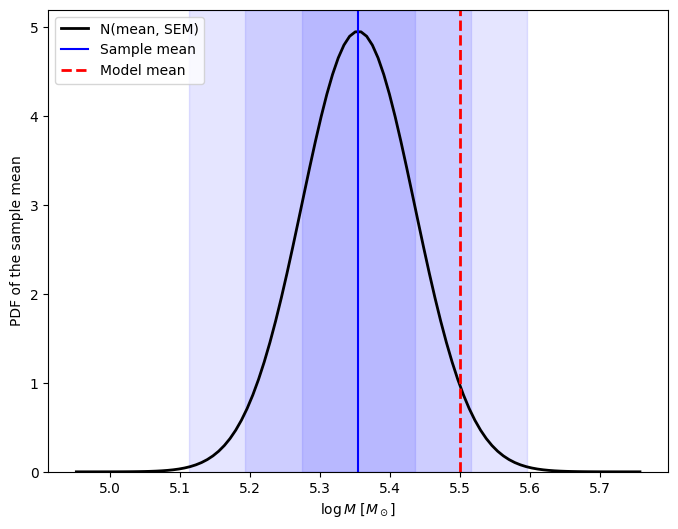

In [23]:
sample_sem = st.sem(log_masses)
print(f"Standard error of the mean = {sample_sem:.2f}")
print(f"Sigma's of difference      : {(model_mean-sample_mean) / sample_sem:.2f}")

x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)
mean_distribution = st.norm(sample_mean, sample_sem)
y_plot = mean_distribution.pdf(x_plot)
plt.figure(figsize=(8,6))
plt.plot(x_plot, y_plot, "k-", lw=2, label="N(mean, SEM)")
plt.axvline(sample_mean, ls="-", color="b", label="Sample mean")
plt.axvline(model_mean, ls="--", lw=2, color="r", label="Model mean")
for sigmas in [1, 2, 3]:
    plt.axvspan(sample_mean - sigmas*sample_sem, sample_mean + sigmas*sample_sem, color="b", alpha=0.1)
plt.legend(loc="upper left")
plt.ylim(ymin=0.0)
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("PDF of the sample mean")
plt.show()

### 19.4.4 Πότε απορρίπτουμε ένα μοντέλο

Κάποιος/α θα μπορούσε να υποστηρίξει ότι εάν η θεωρητική μέση τιμή είναι υπερβολική, είτε πολύ χαμηλή είτε πολύ υψηλή, θα πρέπει να **απορρίψουμε την υπόθεση ότι το μοντέλο περιγράφει τα δεδομένα** που έχουμε στη διάθεσή μας.

Γι' αυτό μπορούμε να υπολογίσουμε την πιθανότητα τέτοιων ακραίων τιμών από την κατανομή της μέσης τιμής του δείγματος.

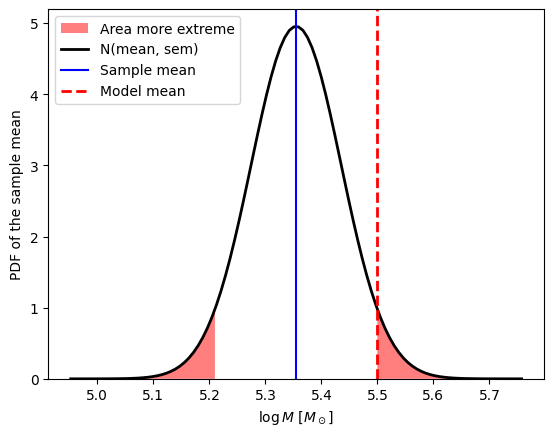

In [24]:
x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)

diff = abs(sample_mean - model_mean)
xx_before = np.linspace(sample_mean - 5 * sample_sem, sample_mean - diff, 100)
xx_after = np.linspace(sample_mean + diff, sample_mean + 5 * sample_sem, 100)

mean_distribution = st.norm(sample_mean, sample_sem)
y_plot = mean_distribution.pdf(x_plot)

plt.figure()
plt.fill_between(xx_before, mean_distribution.pdf(xx_before), 0, color="r", ec="none", alpha=0.5, label="Area more extreme")
plt.fill_between(xx_after, mean_distribution.pdf(xx_after), 0, color="r", ec="none", alpha=0.5)
plt.plot(x_plot, y_plot, "k-", lw=2, label="N(mean, sem)")
plt.axvline(sample_mean, ls="-", color="b", label="Sample mean")
plt.axvline(model_mean, ls="--", lw=2, color="r", label="Model mean")
plt.legend(loc="upper left")
plt.ylim(ymin=0.0)
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("PDF of the sample mean")
plt.show()

Η "περιοχή πιο ακραία" ορίζεται αντίστοιχα: 

$$
\begin{align}
 p   
    &=  1 - \textrm{(area between)} = \\
    &= 1 - \int\limits_{m-d}^{m+d} f(x') dx' = \\
    &= 1 - \left(\int\limits_{-\infty}^{m+d} f(x')dx' - \int\limits_{\infty}^{m-d} f(x')dx' \right) = \\
    &=  1 - \left[F(m+d) - F(m-d)\right]
\end{align}
$$

όπου $m$ η μέση τιμή και $d$ η απόσταση της μέσης τιμής από την τιμή που εξετάζουμε, και η $F(x)$ αντιστοιχεί στην συγκεντρωτική συνάρτηση πιθανότητας. Στην περίπτωσή μας είναι:

In [25]:
area_more_extreme = 1 - (mean_distribution.cdf(sample_mean+diff) - mean_distribution.cdf(sample_mean-diff))
print(f"Area more extreme, p = {area_more_extreme:.4f}")

Area more extreme, p = 0.0716


Με άλλα λόγια, υπάρχει περίπου 7% πιθανότητα, ή αυτό που αποκαλούμε $p$-τιμή ($p$-value), να απορρίψουμε αυτό το μοντέλο ακόμα και αν είναι σωστό. _Μπορούμε να το ρισκάρουμε;_ Είναι δική μας απόφαση να λάβουμε υπόψη μας το κατώτατο όριο (threshold) ή το **επίπεδο σημαντικότητας** (**significance level**)!

Αν είχαμε αποφασίσει **πριν από την εξέταση των δεδομένων** να χρησιμοποιήσουμε ένα κατώτατο όριο του 5%, τότε το συμπέρασμά μας θα ήταν ότι 

> δεν απορρίπτουμε το μοντέλο, με ένα επίπεδο σημαντικότητας του 5%.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
&#9755; **Σημαντική σημείωση:** Δεν αποδεχτήκαμε το μοντέλο.

</div>

Η ανάλυση που πραγματοποιήθηκε παραπάνω δεν επιβεβαιώνει το μοντέλο!!! Το μόνο που ελέγξαμε (και επιβεβαιώσαμε) είναι ότι μια ιδιότητα, η μέση τιμή των δεδομένων δεν είναι τόσο διαφορετική από αυτήν που θα αναμέναμε από το μοντέλο. Αν ήταν, τότε θα είχαμε λόγους να μην πιστεύεαμε το μοντέλο. Π.χ. αν είχαμε βρει $p=0.0001$ **θα απορρίπταμε το μοντέλο** με βάση το δείγμα που έχουμε στη διάθεσή μας.

<div class="alert alert-block alert-info" style="margin-top: 20px">

&#9755; **Σημαντική σημείωση:** Το 7% δεν είναι η πιθανότητα για την υπόθεση (ή το μοντέλο) να είναι σωστό.

</div>

Υπάρχουν άπειρα άλλα μοντέλα για τα οποία η $p$-τιμή παραπάνω θα ήταν πάνω από το κατώτατο όριο. Π.χ. $N(5.5, 0.101)$, $N(5.51, 0.1)$, ...

#### Επιλογή του επιπέδου σημαντικότητας

Δεν υπάρχει κανόνας για το ποιο πρέπει να είναι το επίπεδο σημαντικότητας. Απλά πρέπει να **αποφασίζεται πριν από την εξέταση των δεδομένων**, για να αποφεύγουμε, ως άνθρωποι, **να επηρεάζουμε τα συμπεράσματά μας χαλαρώνοντας τα κριτήρια για τα μοντέλα που μας αρέσουν, ή δυσκολεύοντας τα για μοντέλα που δεν μας αρέσουν!**

Στην Αστρονομία, όπου $2 + 2 \simeq 5$, χρησιμοποιούμε συνήθως το 0.5%, 1% ή 5%. Στην πυρηνική φυσική και σε πειράματα ακρίβειας χρησιμοποιούνται συχνά $10^{-7}$ ή $10^{-10}$.

Καθώς η $p$-τιμή σχετίζεται με τον αριθμό των σίγμα της διαφοράς, συχνά αναφερόμαστε σε *σίγμα* αντί για ένα επίπεδο σημαντικότητας. Είναι πιο σύντομο να λέμε, και είναι πιο εύκολο να το "φανταστούμε" σε γραφήματα με σφάλματα και κατανομές. Για παράδειγμα,

| Σίγμα | Πιθανότητα (εντός) | Πιθανότητα (εκτός) |
| --- | --- | --- |
|  1 | 0.68 | 0.32 |
|  2 | 0.954 | 0.046 |
|  3 | 0.9973 | 0.0027 |
|  5 | 0.9999994 | 0.0000006 |
|  8 | 0.9999999999999987 | 0.0000000000000013

### 19.4.5 Βήματα για τον έλεγχο υπόθεσης 

##### Γενικά

> **Βήμα 1**: Ορίζουμε τη **μηδενική υπόθεση (null hypothesis)** ή την πρόταση που θα ελέγξουμε (ένα μοντέλο ή τυχαίο αποτέλεσμα)

> **Βήμα 2**: Αποφασίζουμε για ένα **επίπεδο σημαντικότητας (significance level)** - ή ποια είναι η "πιθανότητα να κάνουμε λάθος απορρίπτοντας τη μηδενική υπόθεση" με το οποίο είμαστε άνετοι.

> **Βήμα 3**: Η **στατιστική (μετρική, statistic)** - μια ποσότητα που υπολογίζεται στο *δείγμα* μας υποθέτοντας ότι η *υπόθεση είναι αληθής*.

> **Βήμα 4**: Την **$p$-τιμή ($p$-value)** ή **κρίσιμη τιμή (critical value)**: υπολογίζουμε την "πιθανότητα να κάνουμε λάθος" ή την τιμή της στατιστικής μετρικής με βάση την οποία θα απορρίψουμε ή όχι την υπόθεση.

> **Βήμα 5**: Η απόφαση!

- - - 

### 19.4.6 Εφαρμογή στο παράδειγμά μας

Θα δούμε πως εφαρμόζονται αυτά τα βήματα στο παράδειγμα με τα σφαιρωτά σμήνη του Γαλαξία μας.

##### Βήμα 1. Ορίζουμε την μηδενική υπόθεση

> $H_0$: Η μέση τιμή του δεκαδικού λογαρίθμου των μαζών των σφαιρωτών σμηνών του Γαλαξία μας είναι συμβατή με το μοντέλο.

##### Βήμα  2. Αποφασίζουμε για το επίπεδο σημαντικότητας

Αυτή είναι η πιθανότητα της απόρριψης της μηδενικής υπόθεσης εάν είναι αληθής - η "πιθανότητα να κάνουμε λάθος" εάν απορρίψουμε την υπόθεση στο τέλος.


> Ας πάρουμε ένα επίπεδο σημαντικότητας $5%$, δηλαδή $a = 0.05$

##### Βήμα 3. Η στατιστική μετρική, $Z$-score

*Σημείωση:* αφού τη γνωρίζουμε, χρησιμοποιούμε την τυπική απόκλιση της διασποράς του πληθυσμού.

Για να αποφασίσουμε εάν ο μέσος όρος του δείγματος είναι συμβατός με την πρόβλεψη του μοντέλου, πρέπει να υπολογίσουμε τη **κατανομή του μέσου όρου του δείγματος υπό την προϋπόθεση ότι το μοντέλο είναι σωστό**.

Για $N$ παρατηρήσεις $x_i$ ο μέσος όρος του δείγματος, $\bar{x}$ είναι

$$ \bar{x} = \frac{1}{N} \sum\limits_{i=1}^{N} x_i$$

Για παρατηρήσεις που ακολουθούν κανονική κατανομή, $x_i \sim \mathcal{N}(\mu, \sigma^2)$, είναι γνωστό ότι ο μέσος όρος του δείγματος ακολουθεί την κανονικά κατανομή με μέση τιμή ίση με τη μέση τιμή του πληθυσμού ($\mu$) και τυπική απόκλιση ίση με την τυπική απόκλιση του πληθυσμού ($\sigma$) διαιρεμένη με την τετραγωνική ρίζα του μεγέθους του δείγματος ($N$):

$$ \bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{N}\right)$$

... που ονομάζεται *τυπική απόκλιση του μέσου όρου*:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$$

Επομένως η συνάρτηση πυκνότητας πιθανότητας (PDF) του μέσου όρου του δείγματος είναι:

$$f(\bar{x}) = \frac{1}{\sqrt{2\pi \ \sigma_{\bar{x}}^2}} \exp\left[-\frac{\left(\bar{x} - \mu\right)^2}{2 \ \sigma_{\bar{x}}^2}\right]$$

Λόγω της ικανότητας να μετακινήσουμε και να προσαρμόσουμε  την κανονική κατανομή, η ποσότητα

$$ Z = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}} $$

ακολουθεί την τυπική κανονική κατανομή (δηλαδή μέση τιμή $0$ και τυπική απόκλιση $1$):

$$ f(Z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}Z^2}$$

Επομένως, απλά υπολογίζοντας το $Z$-score του δείγματός μας μπορούμε εύκολα να χρησιμοποιήσουμε πίνακες για την κανονική κατανομή ή κώδικα για να υπολογίσουμε γρήγορα την πιθανότητα στην οποία το $Z$ είναι κάτω ή πάνω από μια συγκεκριμένη τιμή.

Αυτή την τιμή του $Z$ ονομάζουμε **στατιστική (μετρική) ή σκορ** και χρησιμοποιείται όταν η ποσότητα που χρησιμοποιούμε για να ελέγξουμε την υπόθεση είναι κανονικά κατανεμημένη.

##### Βήμα 4. $p$-τιμή και κρίσιμη τιμή(-ές) για την στατιστική.

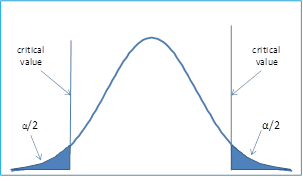

Εξαιτίας της μηδενικής υπόθεσης, πρέπει να ορίσουμε ένα μαθηματικό πλαίσιο το οποίο μπορεί να παρέχει μια απάντηση. Σε αυτό το παράδειγμα, μπορούμε να θεωρήσουμε ότι ο μέσος όρος του δείγματος είναι ασυμβίβαστος με την πρόβλεψη του μοντέλου αν είναι σημαντικά χαμηλότερος ή υψηλότερος (δεν είναι η κατάλληλη μετρική).

Επομένως, το σφάλμα που αντιστοιχεί "στο να κάνουμε λάθος και να απορρίψουμε το μοντέλο" είναι ίσο με την πιθανότητα που το $Z$-score αποκλίνει περισσότερο από την απόλυτη απόκλιση του σκορ για το δείγμα που έχουμε στη διάθεσή μας:

$$ p = P(Z > |z|) + P(Z < -|z|) $$

Χρησιμοποιώντας τη συμμετρία της PDF της κανονικής κατανομής και το γεγονός ότι $P({\rm Α}) + P({\rm not\ Α}) = 1$, φτάνουμε στο

$$ p = \cdots = 2 \left(1 - P\left(Z < |z|\right)\right) = \cdots = 2 P(Z < -|z|)$$

ή απλά,

$$ p = 2 \Phi(-|z|) $$

όπου $\Phi(z)$ είναι η CDF της τυπικής κανονικής κατανομής.

Αν βρούμε $p < a = 0.05$ τότε απορρίπτουμε τη μηδενική υπόθεση.

Εναλλακτικά, μπορούμε να ορίσουμε **κρίσιμες τιμές** του $Z$-score που αντιστοιχούν στο επίπεδο σημαντικότητας της επιλογής μας. Καθώς η απόρριψη πρέπει να συμβεί είτε για υψηλότερες είτε για χαμηλότερες τιμές (δοκιμή δύο ουρών), βρίσκουμε δύο κρίσιμες τιμές που αντιστοιχούν στην πιθανότητα $a/2$:

$$ Z_{\rm crit,1} = \Phi^{-1}\left(\frac{a}{2}\right) = -1.96 $$

$$ Z_{\rm crit,2} = \Phi^{-1}\left(1 - \frac{a}{2}\right) = +1.96 $$

Λόγω της συμμετρίας της κανονικής κατανομής μπορούμε επίσης να υπολογίσουμε μια κρίσιμη τιμή για το απόλυτο $Ζ$-score:

$$ |Z|_{\rm crit} = 1.96 $$

Αυτό ισοδυναμεί με το να ρωτάμε *πόσα **σίγμα** από την πρόβλεψη του μοντέλου μπορεί να βρίσκεται η μετρημένη τιμή προκειμένου να απορρίψουμε τη μηδενική υπόθεση* 
(Οι αστρονόμοι είναι συνηθισμένοι να χρησιμοποιούν τον όρο $\sigma$: "απορρίπτουμε την υπόθεση σε ένα επίπεδο σημαντικότητας $2\sigma$!")

##### Βήμα 5. Απόφαση

Τώρα που ορίσαμε όλα τα βήματα, μπορούμε να τα εφαρμόσουμε στα δεδομένα. Στον παρακάτω κώδικα, υπολογίζουμε τη στατιστική και εκτυπώνουμε το αποτέλεσμα με βάση την $p$-τιμή. Εναλλακτικά, μπορούμε να χρησιμοποιήσουμε την κρίσιμη τιμή.

#### Δοκιμή $Z$

Ας κάνουμε τα παραπάνω με κώδικα, υποθέτοντας ότι γνωρίζουμε την τυπική απόκλιση του πληθυσμού.

In [26]:
# set alpha and compute the critical value(s)
alpha = 0.05
print(f"Significance level: {alpha:7.3f}")

# compute the p-value and report the result
sample_size = len(log_masses)
sample_mean = np.mean(log_masses)
stddev_mean = model_std / (sample_size ** 0.5)
z_score = (sample_mean - model_mean) / stddev_mean
pvalue = 2 * st.norm(0, 1).cdf(-abs(z_score))

print(f"Sample mean       : {sample_mean:7.3f}")
print(f"Standard error    : {stddev_mean:7.3f}")
print(f"Sample Z-score    : {z_score:7.3f}")
print()
print(f"p-value           : {pvalue:7.3f}")

if pvalue <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
    
print()

# alternatively we could compute the critical value and base our outcome on it
z_critical = abs(st.norm.ppf(alpha / 2.0))
print(f"Critical values   : {-z_critical:7.3f} and {z_critical:.3f}")
if abs(z_score) > abs(z_critical):
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")

Significance level:   0.050
Sample mean       :   5.355
Standard error    :   0.111
Sample Z-score    :  -1.306

p-value           :   0.192
    ...we cannot reject the null hypothesis. ****

Critical values   :  -1.960 and 1.960
    ...we cannot reject the null hypothesis. ****


##  19.4.7 Δοκιμή $t$-test

Παραπάνω χρησιμοποιήσαμε τη θεωρητική τιμή του $\sigma$ για να υπολογίσουμε το $Z$-score. Υποθέσαμε ότι γνωρίζουμε την τυπική απόκλιση του πληθυσμού! Στις περισσότερες περιπτώσεις αυτό δεν αληθεύει και δεν την γνωρίζουμε! Αντ' αυτού, εκτιμούμε την παράμετρο του πληθυσμού $\sigma$ από την τυπική απόκλιση στο δείγμα $s$.

_**Σημείωση:**_ χρησιμοποιούμε τις ίδιες τιμές για να υπολογίσουμε το μέσο και την τυπική απόκλιση - επομένως υπάρχει ένα βαθμός ελευθερίας λιγότερο στη στατιστική:

$$ \large \text{dof} = n - 1 $$

*Είναι ο μέσος όρος ενός δείγματος ίσος με τον μέσο όρο του πληθυσμού (χωρίς να γνωρίζουμε την τυπική απόκλιση του πληθυσμού);*

Η κατανομή του μέσου δείγματος τώρα ακολουθεί την κατανομή $t$ του Student.

Η αντίστοιχη στατιστική (μετρική) θα είναι:

$$ \large t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

όπου $s$ είναι η τυπική απόκλιση του δείγματος που παίρνει τη θέση της τυπικής απόκλισης του πληθυσμού στη δοκιμή $Z$ που είδαμε προηγουμένως. Η κατανομή $t$ είναι παρόμοια με τη γκαουσιανή αλλά έχει 'βαρύτερες' ουρές όταν το μέγεθος του δείγματος είναι μικρό

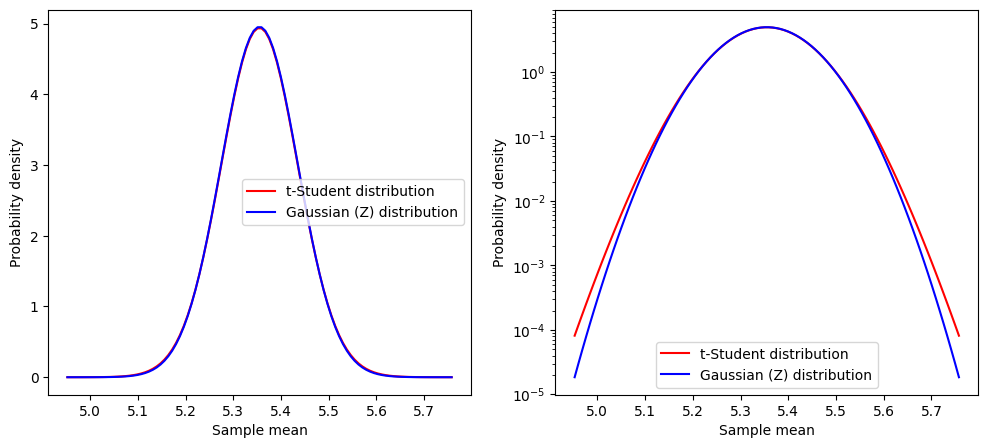

Sample t-score    :  -1.802
p-value           :  0.0753
    ...we cannot reject the null hypothesis. ****

Critical values   :  -1.990 and 1.990
    ...we cannot reject the null hypothesis. ****


In [27]:
x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)

dof = len(log_masses) - 1
Z_dist = st.norm(loc=sample_mean, scale=sample_sem)
t_dist = st.t(dof, loc=sample_mean, scale=sample_sem)

plt.figure(figsize=(12, 5))
for inlog, subplot_index in zip([False, True], [1, 2]):
    plt.subplot(1, 2, subplot_index)
    plt.plot(x_plot, t_dist.pdf(x_plot), "r", label="t-Student distribution")
    plt.plot(x_plot, Z_dist.pdf(x_plot), "b", label="Gaussian (Z) distribution")
    plt.xlabel("Sample mean")
    plt.ylabel("Probability density")
    plt.legend(loc="best")
    if inlog:
        plt.yscale("log")
plt.show()

t_score = (sample_mean - model_mean) / sample_sem
p_value = 2 * st.t(dof).cdf(-abs(t_score))  # implied that loc=0, scale=1

print("Sample t-score    : {:7.3f}".format(t_score))
print("p-value           : {:7.3g}".format(p_value))

if pvalue <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
    
print()

# alternatively we could compute the critical value 
# and base our outcome on it
t_critical = abs(st.t(dof).ppf(alpha / 2.0))
print("Critical values   : {:7.3f} and {:.3f}".format(-t_critical, t_critical))
if abs(t_score) > abs(t_critical):
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")


<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.5</b>

Συμβουλευτείτε το εγχειρίδιο της [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) και πιο συγκεκριμένα εντοπίστε κάτω από το "Hypothesis Tests and related functions" την συνάρτηση εφαρμογής του $t$-test, και εφαρμόστε την στο παράδειγμα με τα σφαιρωτά σμήνη.  

Εκτυπώστε την στατιστική και την αντίστοιχη $p$-τιμή.

In [28]:
# You can try it here

In [29]:
statistic, pvalue = st.ttest_1samp(log_masses, model_mean)
print(f"Statistic = {statistic:.3g}")
print(f"p-value   = {pvalue:.3g}")

Statistic = -1.8
p-value   = 0.0753


## 19.5 Συγκρίνοντας κατανομές

### 19.5.1 Τεστ κανονικότητας

Στα παραπάνω υποθέσαμε ότι ο μέσος όρος του δείγματος ακολουθεί μια κανονική (Γκαουσιανή) κατανομή. Μπορεί όμως και να μην συμβαίνει. Ένας τρόπος για να το ελέγξουμε αυτό είναι να δούμε αν το δείγμα ακολουθεί αυτή την κατανομή (ή και γενικότερα μια οποιαδήποτε άλλη γνωστή κατανομή).

Επιπλέον, στον έλεγχο υπόθεσης, υποθέσαμε ότι τα δεδομένα ακολουθούν κανονική κατανομή. Αυτό είναι μια προσδοκία από τη θεωρία και μπορεί να ελεγχθεί ανεξάρτητα από τις παραμέτρους της Γκαουσιανής κατανομής.

Όταν η ανάλυσή μας εξαρτάται από την "κανονικότητα" μιας κατανομής, είναι καλύτερο να εκτελέσουμε μια δοκιμή υπόθεσης για ακριβώς αυτό - ένα **τεστ κανονικότητας (normallity test)**!

Εδώ χρησιμοποιούμε το **τεστ Shapiro-Wilk για την κανονικότητα** (όχι μοναδικό...) για να ελέγξουμε εάν οι λογαριθμοι των μαζών των σφαιρωτών σμηνών ακολουθούν την κανονική κατανομή.

> Πρέπει πάντα να ρωτάμε ποια είναι η μηδενική υπόθεση όταν χρησιμοποιούμε τέτοια τεστ σαν μαύρο κουτί. 

Για το τεστ Shapiro-Wilk η μηδενική υπόθεση είναι:

> $H_0$: το δείγμα προήλθε από μια κανονικά κατανεμημένη πληθυσμιακή βάση

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.6</b>

Συμβουλευτείτε το εγχειρίδιο της [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) και πιο συγκεκριμένα εντοπίστε κάτω από το "Hypothesis Tests and related functions" την συνάρτηση εφαρμογής του Shapiro-Wilk, και εφαρμόστε την στο παράδειγμα με τα σφαιρωτά σμήνη.  
Εκτυπώστε την στατιστική και την αντίστοιχη $p$-τιμή. 
Ποιο είναι το συμπέρασμα;

In [30]:
# You can try it here

In [31]:
statistic, pvalue = st.shapiro(log_masses)
print(f"Statistic = {statistic:.3g}")
print(f"p-value   = {pvalue:.3g}")

Statistic = 0.983
p-value   = 0.382


Το αποτέλεσμα μας λέει ότι δεν απορρίπτεται η μηδενική υπόθεση, και άρα δεν μπορούμε να πούμε ότι μια κανονική κατανομή δεν περιγράφει τα δεδομένα μας.

### 19.5.2 Τεστ με αυθαίρετες κατανομές: το τεστ Kolmogorov-Smirnov

Σημειώστε ότι ένα τεστ κανονικότητας είναι πολύ συγκεκριμένο για την κατανομή που ελέγχουμε (κανονική/γκαουσιανή)), αλλά όχι για τις παραμέτρους της. Για να ελέγξουμε τη συμφωνία με οποιαδήποτε κατανομή, μπορούμε να χρησιμοποιήσουμε το **τεστ Kolmogorov-Smirnov**.

> $H_0$: το δείγμα προέρχεται από την αναφερόμενη κατανομή

Το τεστ μετρά τη μέγιστη απόσταση μεταξύ δύο συγκεντρωτικών συναρτήσεων κατανομής (από το δείγμα και ένα μοντέλο / ένα άλλο δείγμα), το οποίο ονομάζεται στατιστική $D$. Ανάλογα με τον αριθμό των δειγμάτων, η στατιστική $D$ αντιστοιχεί σε ένα $p$-value. Ας δούμε πώς φαίνεται για το παράδειγμά μας, σε σύγκριση με την μοντέλο κατανομή.

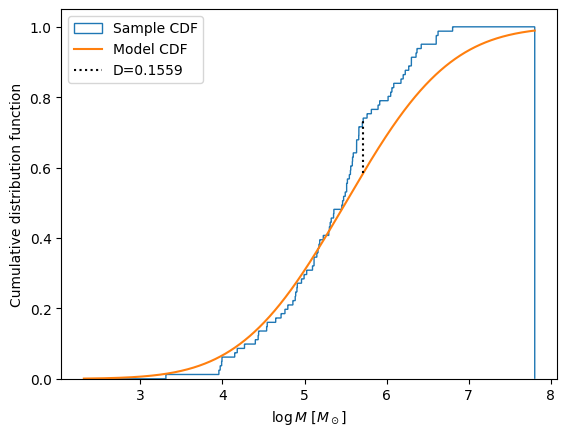

In [32]:
bins = np.linspace(min(log_masses)-1, max(log_masses)+1, 10000)
xx = (bins[1:] + bins[:-1]) / 2.0

model_cdf = st.norm.cdf(xx, loc=model_mean, scale=model_std)
plt.figure()
sample_cdf, _, _ = plt.hist(log_masses, bins=bins, density=True, 
                            cumulative=1, 
                            histtype="step", label="Sample CDF")

# where is the maximum difference between the model and sample CDFs?
where_max_d = np.argmax(np.abs(model_cdf - sample_cdf))

# find the height of the CDFs at their furthest point
D1, D2 = model_cdf[where_max_d], sample_cdf[where_max_d]

# the maximum difference
D = abs(D1 - D2)

plt.plot(xx, model_cdf, label="Model CDF")
plt.plot([xx[where_max_d]]*2, [D1, D2], "k:", label="D={:.4g}".format(D))
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("Cumulative distribution function")
plt.legend(loc="upper left")
plt.show()

Μπορούμε να εφαρμόσουμε το τεστ από την `SciPy` κατευθείαν:

In [33]:
# kstest from scipy.stats
model_distribution = st.norm(model_mean, model_std)
statistic, pvalue  = st.kstest(log_masses, model_distribution.cdf)

print(f"Statistic = {statistic:.3g}")
print(f"p-value   = {pvalue:.3g}")

Statistic = 0.156
p-value   = 0.0348


Το αποτέλεσμα μας λέει ότι απορρίπτεται η μηδενική υπόθεση, δηλαδή το δείγμα μας δεν φαίνεται να ακολουθεί το μοντέλο. 

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 19.7</b>

Διαβάστε τον κατάλογο με τις γραμμές εκπομπής από την εργασία των Stampoulis et al. (2019) ('data_files/Stampoulis+19_Table_2.csv'). Χρησιμοποιείστε μόνο τις τέσσερις στήλες που περιέχουν τις μετρήσεις των λόγων γραμμών και κάντε τα εξής:
    
1. Αν ζεύγη κάντε ένα ιστόγραμμα για να δείτε τις κατανομές τους. 
    
2. Εφαρμόστε ένα τέστ Kolmogorov-Smirnov για τις (κάθε) δύο κατανομές και τυπώστε το αποτέλεσμα. Τι συμπεραίνετε;
    
3. (BONUS) Κάντε τα διαγράμματα των συγκεντρωτικών κατανομών πιθανότητας (CDF). Τι παρατηρείτε;
    
> **TIP:** 
>
>- Χρησιμοποιήστε την συνάρτηση `ks_2samp` αν η άλλη δεν δουλεύει.
>
> - Για τα CDF θα πρέπει (ενδεχόμενα) να δημιουργήσετε τις κατανομές εσείς: 
>    1. Πρώτα κάντε ένα `np.sort` την κατανομή των δεδομένων σας. Έτσι οι χαμηλότερες τιμές θα βρεθούν πρώτες
>    2. Για το CDF σε κάθε βήμα πρακτικά προσθέτετε όλα τα σημεία από τα προηγούμενα. Για να γίνει στην πράξη κάνετε ένα range με τον αριθμό των δεδομένων σας και μετά κανονικοποιείται ως προς το συνολικό αριθμό τους (θυμηθείτε ότι το CDF καταλήγει στην 1)
>    3. Για το διάγραμμα χρησιμοποιείστε την συνάρτηση `np.step`.

In [34]:
# You can try it here

In [35]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data_files/Stampoulis+19_Table_2.csv', delimiter=',', skiprows=1)

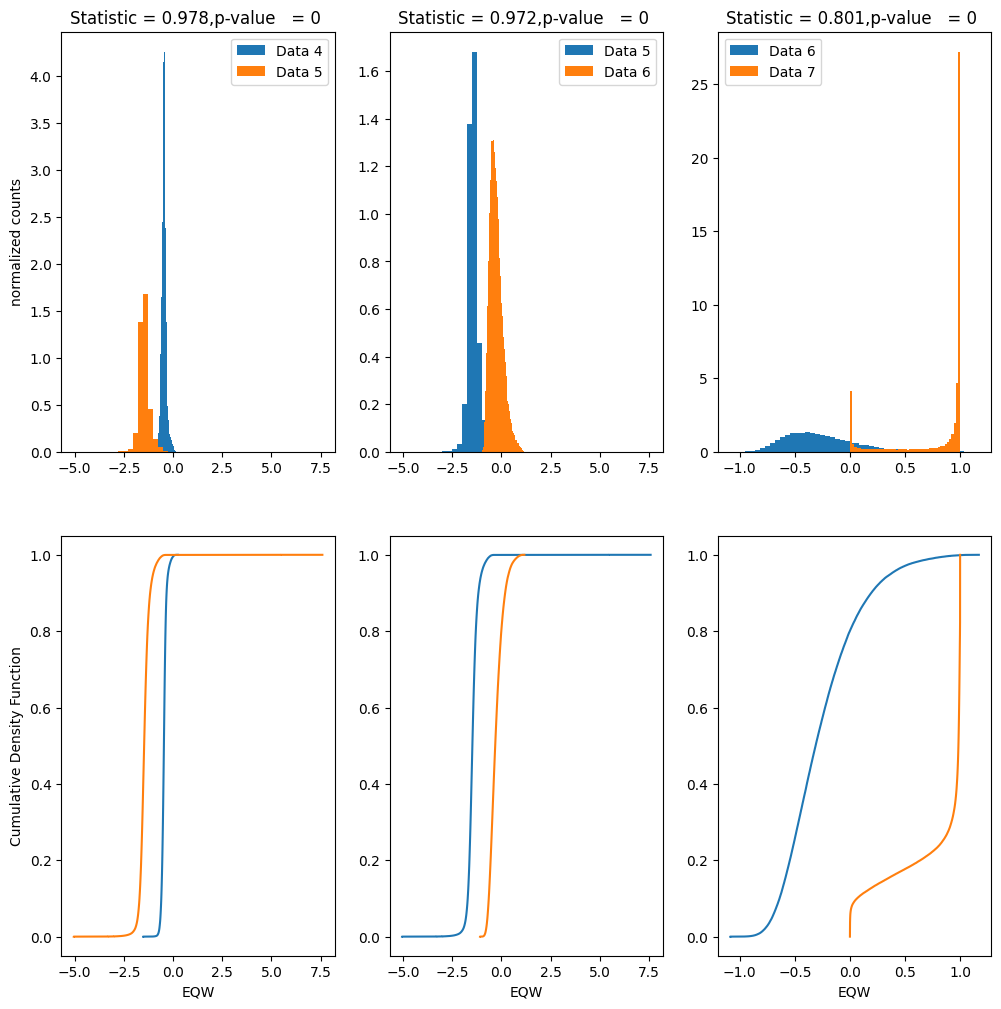

In [36]:
fig, axs = plt.subplots(2,3,figsize=(12,12))

for i in range(3):
    axs[0,i].hist(data[:,i+4], bins=50, density=True, 
               histtype='stepfilled', label=f"Data {i+4}")
    axs[0,i].hist(data[:,i+5], bins=50, density=True, 
               histtype='stepfilled', label=f"Data {i+5}")
    axs[0,i].legend()

    statistic, pvalue  = st.ks_2samp(data[:,i+4], data[:,i+5])

#     print(f"Statistic = {statistic:.3g}")
#     print(f"p-value   = {pvalue:.3g}") 
    
    axs[0,i].set_title(f"Statistic = {statistic:.3g},p-value   = {pvalue:.3g} ")
    
    for k in [0,1]:
        sorted_dt = np.sort(data[:,i+4+k])
        cum_prob = np.arange(1, len(sorted_dt)+1) / len(sorted_dt)

        axs[1,i].step(sorted_dt, cum_prob)
        
    axs[1,i].set_xlabel("EQW")
        
    
axs[0,0].set_ylabel("normalized counts")
axs[1,0].set_ylabel("Cumulative Density Function")

plt.show()

In [ ]:
# EOF